In [1]:
import sklearn_crfsuite
import pickle
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn_crfsuite import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from helper.dataset_reader import read_tsv
from helper.features import feature_extraction_basic, feature_extraction_added

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = read_tsv('../raw dataset/all-tagged-280322.tsv')

In [8]:
arr = np.array(data)
arr.shape

<ipython-input-8-0f60f892f053>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr = np.array(data)


(3,)

In [9]:
all_tokens = []
all_tags = []
X = []
for tokens, tags in data[0]:
    all_tokens.append(tokens)
    all_tags.append(tags)

y = all_tags
for tokens in all_tokens:
    X.append(feature_extraction_basic(tokens, 5))

In [11]:
all_tokens

[['Tumben',
  'xl',
  'banter',
  'go',
  'download',
  ',',
  ',',
  'download',
  'video',
  'tom',
  'jerry',
  'ya',
  'masuk',
  'kie',
  'https://t.co/SmrXmut7wk'],
 ['@myXL',
  '@myXLCare',
  'knp',
  'xl',
  'skr',
  'jd',
  'susah',
  'signal',
  'ya',
  ',',
  'dan',
  'download',
  'paling',
  'banter',
  '70kbps',
  '.',
  'Sangat',
  'disayangkan'],
 ['Lak',
  'download',
  'nggawe',
  'cl',
  'iku',
  'subuh',
  'baru',
  'banter',
  '.',
  'Lak',
  'sore-bengi',
  'lemot',
  "''",
  '@kecepoood',
  ':',
  'XL',
  'labil',
  'donlod',
  'munggah',
  'mudun',
  '😩',
  '"'],
 ['xl',
  'ngebut',
  '.',
  'Banter',
  'banget',
  '.',
  'Download',
  '0,7GB',
  'hanya',
  '26',
  'menit',
  '.'],
 ['Opone',
  'banter',
  'limite',
  'mek',
  '512kbps',
  'RT',
  '@aslisuroboyo:',
  'Nggawe',
  'XL',
  'unlimited',
  'streaming',
  'youtube',
  'karo',
  'download',
  'kenceng',
  '!',
  'Info',
  ':',
  'http://t.co/oXbsXMkMF1'],
 ['Lagi',
  'banter',
  'nih',
  'yank',
  '.',

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)
#test_size=0.40 --> 40% of the dataset are used for testing
#random_state=some number. This guarantee that the output of Run 1 will be equal to the output of Run 2. i.e. the split will be always the same.

In [5]:
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',  # for gradient descent for optimization and getting model parameters
    c1=0.1, # Coefficient for Lasso (L1) regularization
    c2=0.1, # Coefficient for Ridge (L2) regularization
    max_iterations=100, # The maximum number of iterations for optimization algorithms, iteration for the gradient descent optimization
    all_possible_transitions=True   # Specify whether CRFsuite generates transition features that do not even occur in the training data
)

In [6]:
try:
    crf.fit(X_train, y_train)
except AttributeError:
    pass

In [7]:
# save the model to disk
root_path = '../model/'
joined_path = os.path.join(root_path, 'model.sav')
pickle.dump(crf, open(joined_path, 'wb'))

In [8]:
labels = ['ID', 'JV', 'EN', 'NE', 'O', 'MIX-ID-EN', 'MIX-ID-JV', 'MIX-JV-EN']
y_pred = crf.predict(X_test)
print('Testing Data Performance')
print(metrics.flat_classification_report(y_test, y_pred, labels=labels))

y_pred_train = crf.predict(X_train)
print('Training Data Performance')
print(metrics.flat_classification_report(y_train, y_pred_train, labels=labels))

Testing Data Performance
              precision    recall  f1-score   support

          ID       0.87      0.97      0.91     15356
          JV       0.83      0.80      0.82      3597
          EN       0.93      0.58      0.71      1947
          NE       0.90      0.37      0.53       998
           O       0.96      0.94      0.95      5928
   MIX-ID-EN       0.98      0.82      0.89       839
   MIX-ID-JV       0.99      0.80      0.88       254
   MIX-JV-EN       0.97      0.80      0.87       212

    accuracy                           0.89     29131
   macro avg       0.93      0.76      0.82     29131
weighted avg       0.89      0.89      0.88     29131

Training Data Performance
              precision    recall  f1-score   support

          ID       0.96      0.99      0.97     22649
          JV       0.93      0.93      0.93      5321
          EN       0.98      0.90      0.94      2930
          NE       0.98      0.81      0.89      1614
           O       0.99    

Confusion_matrix
[[14865   336    34    10   110     1     0     0]
 [  653  2885    21     8    28     0     2     0]
 [  702    72  1127    19    27     0     0     0]
 [  513    79    15   373    18     0     0     0]
 [  287    49     6     3  5582     0     0     1]
 [  112     5    13     0    16   688     0     5]
 [   32    17     0     0     3     0   202     0]
 [    8    18     2     0     2    13     0   169]]


[Text(0, 0.5, 'ID'),
 Text(0, 1.5, 'JV'),
 Text(0, 2.5, 'EN'),
 Text(0, 3.5, 'NE'),
 Text(0, 4.5, 'O'),
 Text(0, 5.5, 'MIX-ID-EN'),
 Text(0, 6.5, 'MIX-ID-JV'),
 Text(0, 7.5, 'MIX-JV-EN')]

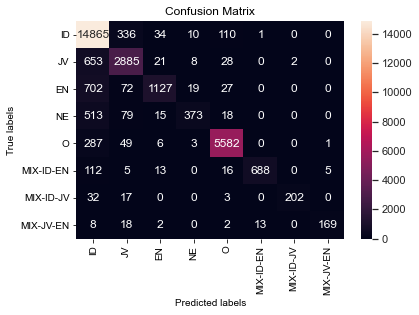

In [9]:
print('Confusion_matrix')
flat_y_test = [item for y_ in y_test for item in y_]
flat_y_pred_test = [item for y_pr in y_pred for item in y_pr]
cm = confusion_matrix(flat_y_test, flat_y_pred_test, labels=['ID', 'JV', 'EN', 'NE', 'O', 'MIX-ID-EN', 'MIX-ID-JV', 'MIX-JV-EN'])
print(cm)
#sns.heatmap(cm, annot=True, fmt='d', ax=ax)
ax= plt.subplot()
sns.set(rc = {'figure.figsize':(20,18)})
sns.heatmap(cm, annot=True, fmt='d', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['ID', 'JV', 'EN', 'NE', 'O', 'MIX-ID-EN', 'MIX-ID-JV', 'MIX-JV-EN'], rotation=90)
ax.yaxis.set_ticklabels(['ID', 'JV', 'EN', 'NE', 'O', 'MIX-ID-EN', 'MIX-ID-JV', 'MIX-JV-EN'], rotation=0)


Confusion_matrix
[[22339   237    30    10    33     0     0     0]
 [  370  4931    10     3     6     0     0     1]
 [  211    62  2646     6     5     0     0     0]
 [  229    56     5  1305    19     0     0     0]
 [  141    27     7     1  8394     0     0     2]
 [   35     1     0     0     5  1220     1     5]
 [   17     4     0     1     1     0   349     0]
 [    2     9     0     0     2    10     0   290]]


[Text(0, 0.5, 'ID'),
 Text(0, 1.5, 'JV'),
 Text(0, 2.5, 'EN'),
 Text(0, 3.5, 'NE'),
 Text(0, 4.5, 'O'),
 Text(0, 5.5, 'MIX-ID-EN'),
 Text(0, 6.5, 'MIX-ID-JV'),
 Text(0, 7.5, 'MIX-JV-EN')]

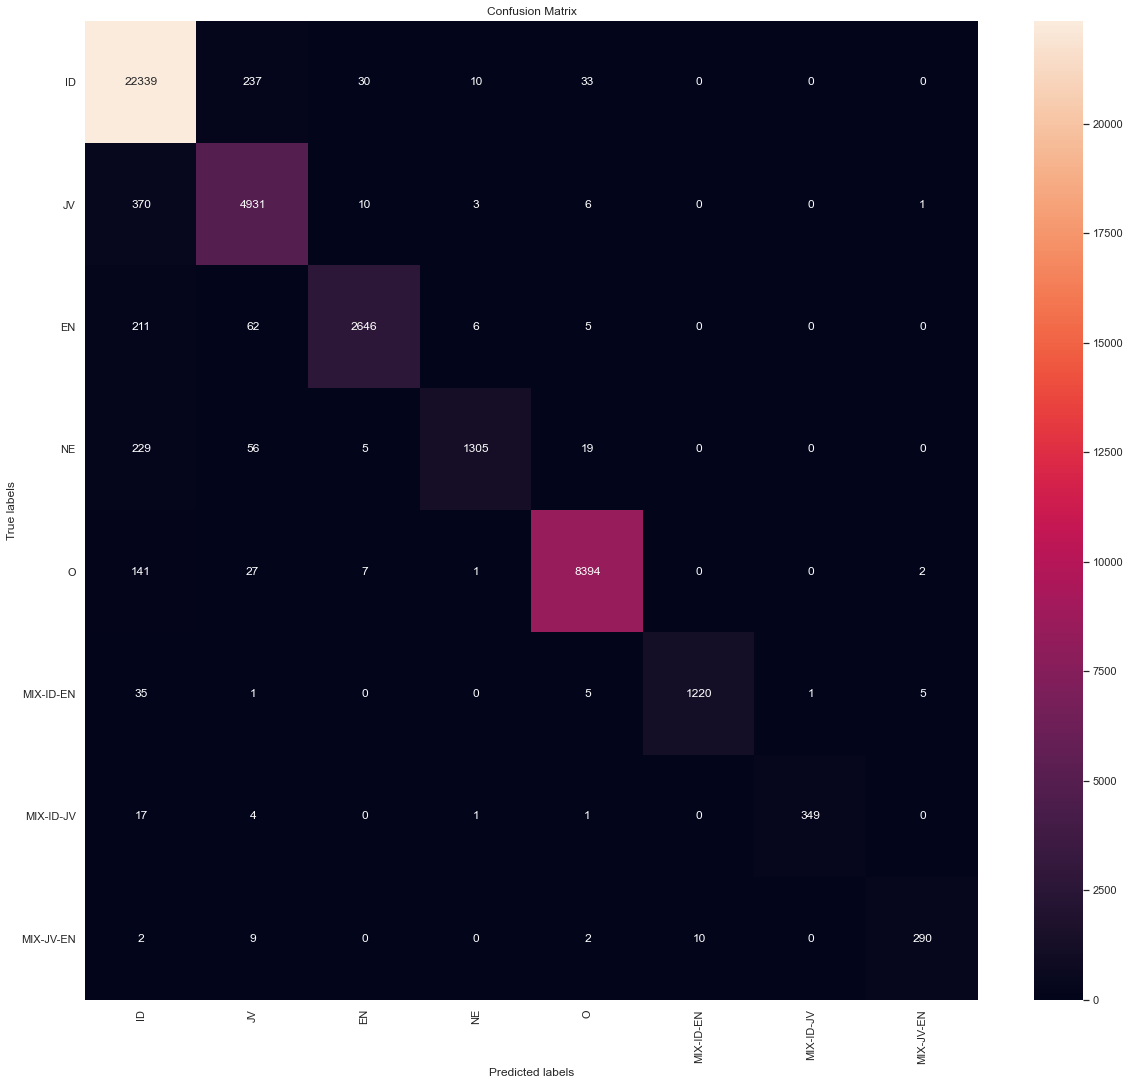

In [11]:
print('Confusion_matrix')
flat_y_train = [item for y_tr in y_train for item in y_tr]
flat_y_pred_train = [item for y_pr_tr in y_pred_train for item in y_pr_tr]
cm = confusion_matrix(flat_y_train, flat_y_pred_train, labels=['ID', 'JV', 'EN', 'NE', 'O', 'MIX-ID-EN', 'MIX-ID-JV', 'MIX-JV-EN'])
print(cm)
#sns.heatmap(cm, annot=True, fmt='d', ax=ax)
ax= plt.subplot()
sns.set(rc = {'figure.figsize':(20,18)})
sns.heatmap(cm, annot=True, fmt='d', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['ID', 'JV', 'EN', 'NE', 'O', 'MIX-ID-EN', 'MIX-ID-JV', 'MIX-JV-EN'], rotation=90)
ax.yaxis.set_ticklabels(['ID', 'JV', 'EN', 'NE', 'O', 'MIX-ID-EN', 'MIX-ID-JV', 'MIX-JV-EN'], rotation=0)